<a href="https://colab.research.google.com/github/anastasiablokhina/Machine_Learning/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

В предложенном файле находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры.

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/731db936907662ea44eaff6955678281/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/72_36.csv', header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9
0,-7.551127,-16.501883,12.214029,-4.532918,7.195725,-10.695086,-21.060089,-23.861166,-2.754803,11.277232
1,15.332258,-2.873288,-18.918645,-19.692909,9.338751,14.829184,-7.771072,-5.460143,14.528354,-13.885432
2,-11.447178,-12.150761,-18.801647,-24.051650,15.213106,18.650944,5.061457,-9.081610,-24.478108,-16.165841
3,16.922389,-4.922460,-21.959687,-19.735653,9.871696,15.691369,-11.258013,-3.755190,9.735562,-10.922091
4,13.683867,-2.109327,-20.939583,-18.912884,7.441524,13.049203,-8.486979,-7.611905,10.369139,-9.060181


Введите координату первого объекта относительно первой главной компоненты, относительно второй главной компоненты.

In [8]:
pca = PCA(n_components=2, svd_solver='full')
data_transformed = pca.fit(data).transform(data)
data_transformed[0]

array([ 21.5685525 , -20.11266413])

Введите долю объясненной дисперсии при использовании первых двух главных компонент.

In [9]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.438, 0.659])

Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85.

In [10]:
pca = PCA(n_components=10, svd_solver='auto')
data_full = pca.fit(data).transform(data)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.438, 0.659, 0.86 , 0.979, 0.993, 0.995, 0.997, 0.998, 0.999,
       1.   ])

Какое количество групп объектов можно выделить, если использовать только первые две главных компоненты?

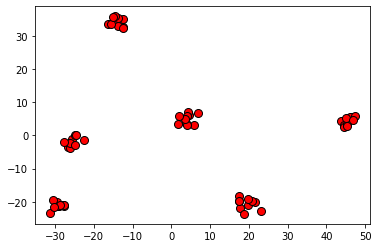

In [11]:
plt.plot(data_transformed[:60, 0], data_transformed[:60, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8);

# Задание 2

Получите изображение логотипа по первым десяти главным компонентам и восстановите исходное изображение.

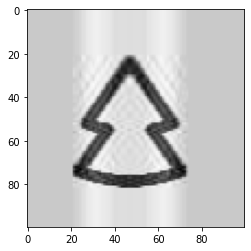

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
scores = np.genfromtxt('https://courses.openedu.ru/assets/courseware/v1/fff656446d36c916cb7a57da7cce7b77/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/X_reduced_441.csv', delimiter=';')
loadings = np.genfromtxt('https://courses.openedu.ru/assets/courseware/v1/f2560b95e59db0b0c09eba1a8d2c1688/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/X_loadings_441.csv', delimiter=';')
values = np.dot(scores,loadings.T)
plt.imshow(values, cmap='Greys_r');